<a href="https://colab.research.google.com/github/Shalini497/DataScience-projects/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install textblob

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving chrome_reviews.csv to chrome_reviews (3).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['chrome_reviews.csv']))

In [ ]:
df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


In [ ]:
df.shape

(7204, 10)

In [ ]:
df.dtypes

ID                  int64
Review URL         object
Text               object
Star                int64
Thumbs Up           int64
User Name          object
Developer Reply    object
Version            object
Review Date        object
App ID             object
dtype: object

In [ ]:
a = lambda x: str(x).split(',')
df['Text'].apply(a)

0                            [This is very helpfull aap.]
1                                                  [Good]
2        [Not able to update. Neither able to uninstall.]
3                                              [Nice app]
4                                     [Many unwanted ads]
                              ...                        
7199                                          [Bagusss..]
7200                                      [Bad version 😔]
7201    [One thing that I have to say I can't spelled ...
7202                                          [Excellent]
7203    [After update it lag and always slow same goes...
Name: Text, Length: 7204, dtype: object

In [ ]:
# Now doing EDA ( Exploratory Data Analysis) by DataPrep

In [ ]:
df.isnull().sum()

ID                    0
Review URL            0
Text                  1
Star                  0
Thumbs Up             0
User Name             0
Developer Reply    7109
Version              85
Review Date           0
App ID                0
dtype: int64

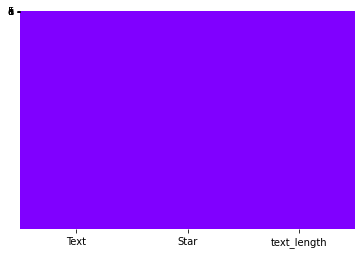

In [ ]:
sns.heatmap(df.isnull(),cbar=False,yticklabels="False",cmap="rainbow")

In [ ]:
# Now we have to drop large missing values feature to make it standardize form

In [ ]:
df.drop(['Developer Reply'],axis = 1, inplace = True)

In [ ]:
df['Version']

0       83.0.4103.106
1       85.0.4183.127
2       85.0.4183.127
3       77.0.3865.116
4        87.0.4280.66
            ...      
7199     88.0.4324.93
7200    88.0.4324.181
7201     89.0.4389.72
7202     89.0.4389.72
7203     88.0.4324.93
Name: Version, Length: 7204, dtype: object

In [ ]:
# for filling the missing value in Version by using function method

In [ ]:
def versions(cols):
  Version = cols[0]
  Star = cols[1]

  if pd.isnull(Version):

    if Star == 5:
      return 81
    
    elif Star == 1:
      return 87

    elif Star == 3:
      return 85 	

    elif Star == 2:
      return 83

    elif Star == 4:
      return 77

    else:
      return 31
  else:
    return Version

In [ ]:
# Now apply that function

In [ ]:
df['Version'] = df[['Version','Star']].apply(versions,axis=1)

In [ ]:
# Now let check the missing values again

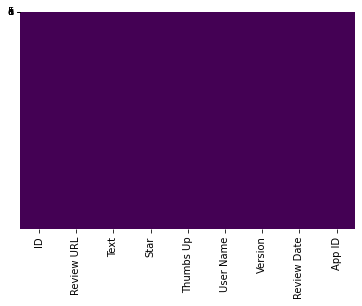

In [ ]:
sns.heatmap(df.isnull(),yticklabels="False",cmap='viridis',cbar=False)

In [ ]:
#  So now our data is in Standardized form and rady to modelling

In [ ]:
# Now drop the all columns except Star And Text beacuse we need only these two columns

In [ ]:
df = df.drop(['ID','Review URL','Thumbs Up','User Name','Version','Review Date','App ID'],axis=1)

In [ ]:
df.head()

,Text,Star
0,This is very helpfull aap.,5
1,Good,3
2,Not able to update. Neither able to uninstall.,1
3,Nice app,4
4,Many unwanted ads,1


In [ ]:
# NOW WE HAVE TO DO DATA ANALYSIS AND VISUALISATION FOR FINDING FOR DETAILS ABOUT THIS

In [ ]:
# Adding Features

In [ ]:
df['text_length'] = df['Text'].str.len()
print(df.shape)
df.head()

(7204, 3)


,Text,Star,text_length
0,This is very helpfull aap.,5,26.0
1,Good,3,4.0
2,Not able to update. Neither able to uninstall.,1,46.0
3,Nice app,4,8.0
4,Many unwanted ads,1,17.0


In [ ]:
df['text_length'].describe()

count    7203.000000
mean       36.195058
std        65.038639
min         1.000000
25%         4.000000
50%        12.000000
75%        35.000000
max       591.000000
Name: text_length, dtype: float64

In [ ]:
# Visualised the data by overall Stars

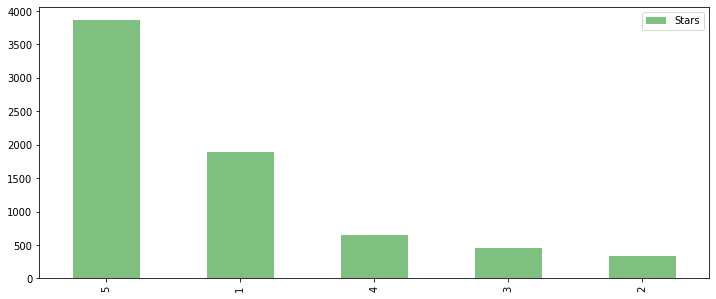

In [ ]:
plt.figure(figsize=(12,5))
df['Star'].value_counts().plot(kind='bar',alpha=0.5,color='green',label='Stars')
plt.legend()
plt.show()

In [ ]:
# Check the Stars according to Star- Wise

In [ ]:
# FIRST STAR

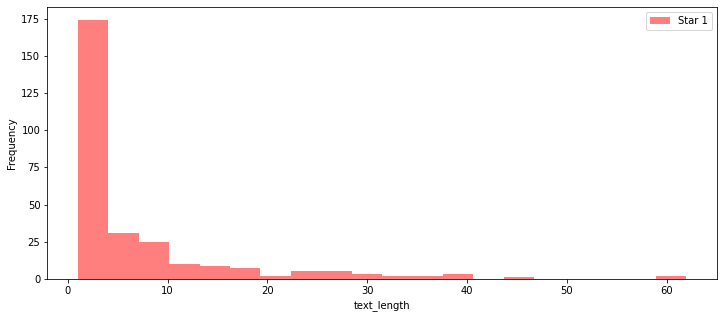

In [ ]:
plt.figure(figsize=(12,5))
df[df['Star']==1]['text_length'].value_counts().plot(bins=20,alpha=0.5,kind='hist',color='red',label='Star 1')
plt.legend()
plt.xlabel('text_length')
plt.show()

In [ ]:
# SECOND STAR

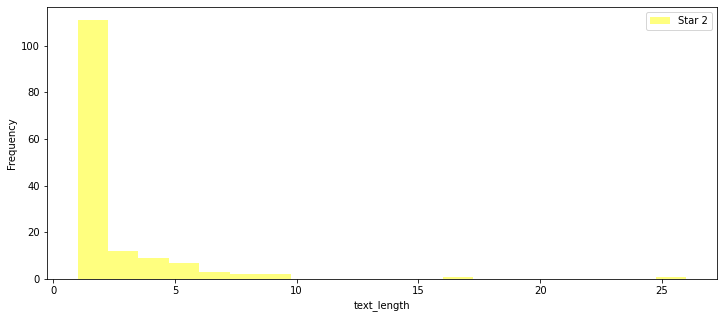

In [ ]:
plt.figure(figsize=(12,5))
df[df['Star']==2]['text_length'].value_counts().plot(bins=20,alpha=0.5,kind='hist',color='yellow',label='Star 2')
plt.legend()
plt.xlabel('text_length')
plt.show()

In [ ]:
# THIRD STAR

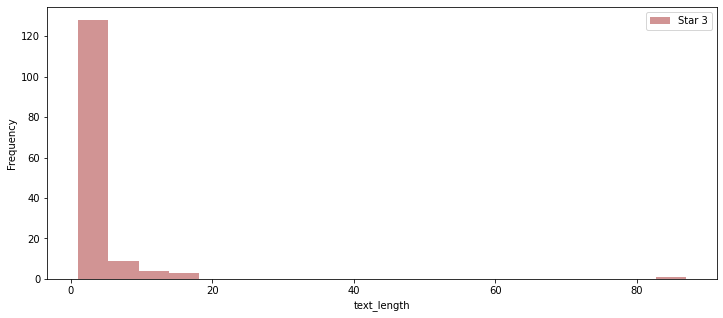

In [ ]:
plt.figure(figsize=(12,5))
df[df['Star']==3]['text_length'].value_counts().plot(bins=20,alpha=0.5,kind='hist',color='brown',label='Star 3')
plt.legend()
plt.xlabel('text_length')
plt.show()

In [ ]:
# FORTH AND FIFTH STAR

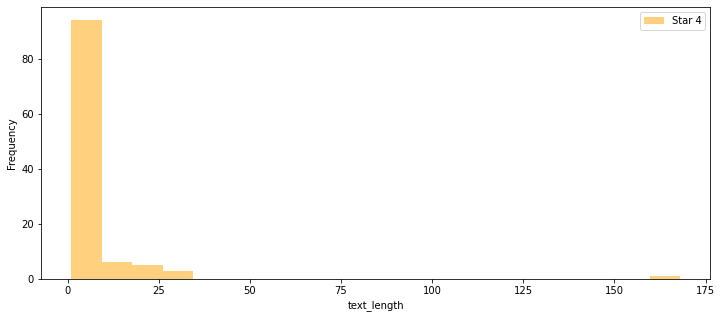

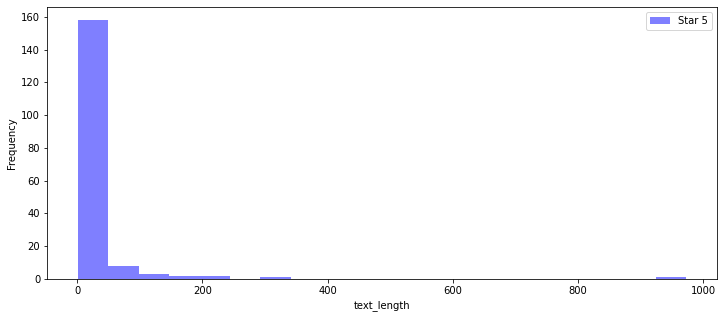

In [ ]:
plt.figure(figsize=(12,5))
df[df['Star']==4]['text_length'].value_counts().plot(bins=20,alpha=0.5,kind='hist',color='orange',label='Star 4')
plt.legend()
plt.xlabel('text_length')
plt.show()

plt.figure(figsize=(12,5))
df[df['Star']==5]['text_length'].value_counts().plot(bins=20,alpha=0.5,kind='hist',color='blue',label='Star 5')
plt.legend()
plt.xlabel('text_length')
plt.show()

In [ ]:
# As we conclude taht Rating 1-3 have simliar tend of length in which there is some bad reviews and may be complain with some good reviews also having less rating. And rating 4-5
# as we see have good reviews ,appreciation and positive talk.

In [ ]:
# DATA CLEANSING AND PREPROCESSING

In [ ]:
# From the above analysis we are summing up it into two class classification problem ,where reviews with rating 1-3 are classified as 0 and reviews with in range 4-5 are classfied as 1

In [ ]:
# Here we are using numpy's where clause to convert reviews into two-class i.e 0 and 1

In [ ]:
df['Star'] = np.where(df['Star']>3,1,0)

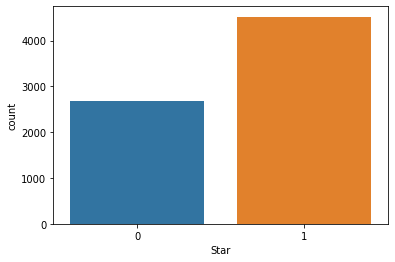

In [ ]:
sns.countplot(df['Star'])

In [ ]:
df['Star'].unique()

array([1, 0])

In [ ]:
df['Star'].value_counts(normalize=True)

1    0.627846
0    0.372154
Name: Star, dtype: float64

In [ ]:
# SO NOW WE EXTRACT POSITIVE / NEGATIVE REVIEWS

In [ ]:
df['Text'] = df['Text'].apply(str)

In [ ]:
positive=[]
negative=[]
positive_reviews=df[df['Star']==1]['Text']
negative_reviews=df[df['Star']==0]['Text']


In [ ]:
# The extract the Positive words from reviews do following things:
# extract positive word and tokenize them
# remove the stopwords
# convert them into lowercase

In [ ]:
def extract_positive(positive_reviews):
    global positive
    words = [word.lower() for word in word_tokenize(positive_reviews) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    positive=positive+words

In [ ]:
# Similary extrect Negative reviews

In [ ]:
def extract_negative(negative_reviews):
    global negative
    words = [word.lower() for word in word_tokenize(negative_reviews) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    negative=negative+words

In [ ]:
# Now Apply this function into reviews

In [ ]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
positive_reviews.apply(extract_positive)
negative_reviews.apply(extract_negative)

1       None
2       None
4       None
8       None
9       None
        ... 
7196    None
7197    None
7198    None
7200    None
7203    None
Name: Text, Length: 2681, dtype: object

In [ ]:
# Here we use WorldCloud in our dataset for highlight the most frequent and important words in it.

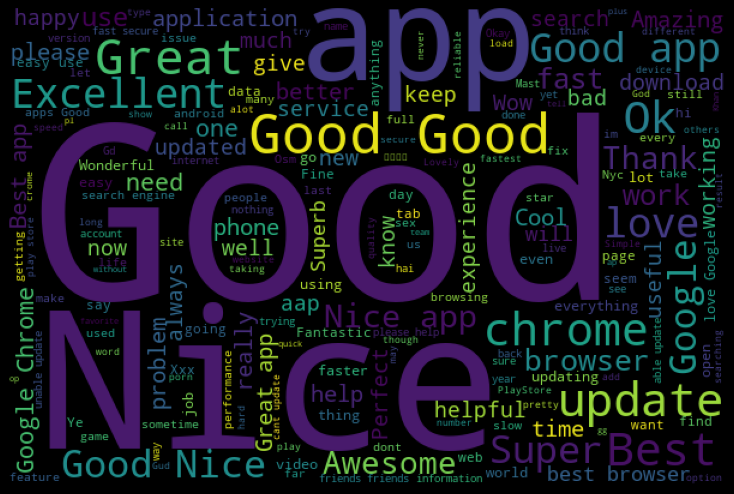

In [ ]:
from wordcloud import WordCloud
pos_review_cloud=WordCloud(width=600,height=400).generate(" ".join(positive_reviews))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(pos_review_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# As we clearly see there is so many positive words are there which highligth like : Good,Nice,Update

In [ ]:
# Now find Negative Words here

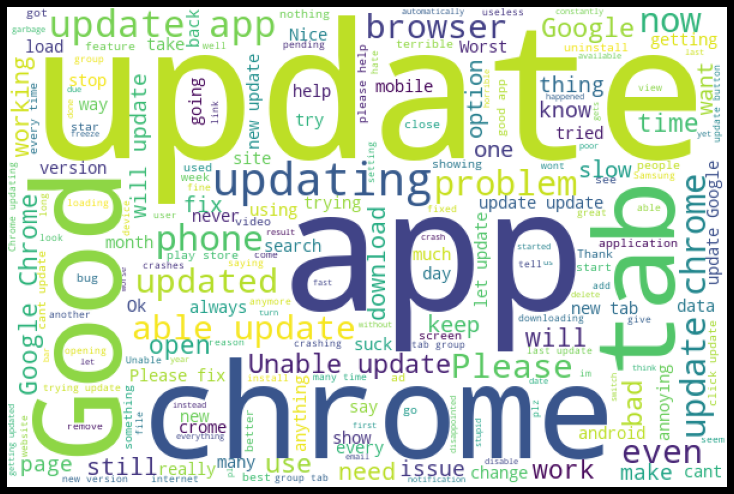

In [ ]:
neg_review_cloud=WordCloud(width=600,height=400,background_color='white').generate(" ".join(negative_reviews))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(neg_review_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Some words could be a part of suggestion and negative reviews like: chrome,update,app

In [ ]:
stemmer = SnowballStemmer("english")

def ReadyText(message):
    
    message = message.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
    
    return " ".join(words)

df["Text"] = df["Text"].apply(ReadyText)
df.head(n = 10)    

,Text,Star,text_length
0,helpful aap,1,26.0
1,good,0,4.0
2,abl updat neither abl uninstal,0,46.0
3,nice app,1,8.0
4,mani unwant ad,0,17.0
5,app good,1,13.0
6,yes yes,1,7.0
7,awesom,1,7.0
8,bad app 😞,0,14.0
9,mani time tri updat updat whenev tri use app f...,0,117.0


In [ ]:
# NOW WE HAVE TO DIVIDE OUR  DATA INTO DEPENDENT AND INDEPENDENT VARIABLES

In [ ]:
x = df['Text']
y = df['Star']

In [ ]:
# NOW SPLIT THE DATASET INTO TRAIN_TEST_SPLIT

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=14,test_size=0.2)

In [ ]:
print("x_train shape :",x_train.shape)
print("x_test shape  :",x_test.shape)
print("y_train shape :",y_train.shape)
print("y_tets shape  :",y_test.shape)

x_train shape : (5763,)
x_test shape  : (1441,)
y_train shape : (5763,)
y_tets shape  : (1441,)


In [ ]:
# AS WE KNOW THAT MACHINE LEARNING DOESN'T ACCEPT TEXT SO WE HAVE TO CONVERT THEM INTO VECTOR FORM WITH THE HELP OF COUNTVECTORIZER

In [ ]:
# here we use three Machine learning Algorithm to find results

In [ ]:
# 1 Logistic Regression

In [ ]:
cv=CountVectorizer()
lr=LogisticRegression(max_iter=10000)
x_train=cv.fit_transform(x_train)
lr.fit(x_train,y_train)
pred_1=lr.predict(cv.transform(x_test))
score_1=accuracy_score(y_test,pred_1)

In [ ]:
# Accuracy Score:

In [ ]:
print(score_1*100)

83.76127689104788


In [ ]:
# Making Prediction of Logistic Regression

In [ ]:
print(lr.predict(cv.transform(['Not able to update. Neither able to uninstall'])))

[0]


In [ ]:
# our Model work properly and give prediction accurately which is "Negative"

In [ ]:
# Confusion Matrix :Logistic Regression

<Figure size 432x288 with 0 Axes>

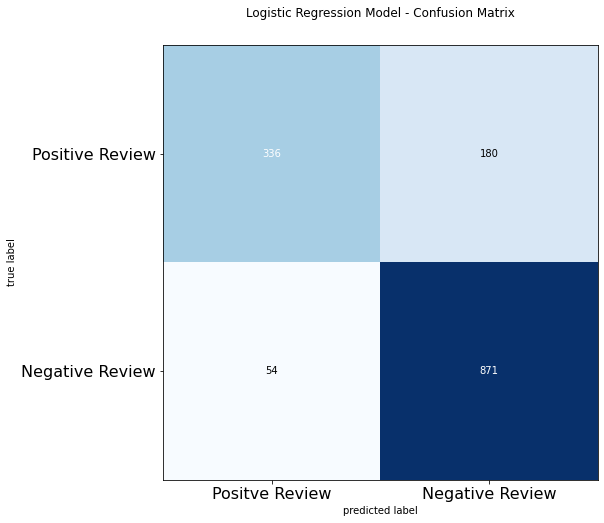

In [ ]:
cm = confusion_matrix(y_test, pred_1)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Positve Review","Negative Review"], fontsize=16)
plt.yticks(range(2), ["Positive Review","Negative Review"], fontsize=16)
plt.show()

In [ ]:
# here we find out the required result which we want as per logistic regression based

In [ ]:
# 2 : Navie Bayes

In [ ]:
nb=MultinomialNB()
nb.fit(x_train,y_train)
pred_2=nb.predict(cv.transform(x_test))
score_2=accuracy_score(y_test,pred_2)

In [ ]:
# Accuracy Score:

In [ ]:
print(score_2*100)

84.03886190145732


In [ ]:
# prediction :

In [ ]:
print(nb.predict(cv.transform(['This is very helpfull aap.'])))

[1]


In [ ]:
# this algo correctly predict the rating of text which is "Positive"

In [ ]:
# Confusion Matrix:Naive Bayes

<Figure size 432x288 with 0 Axes>

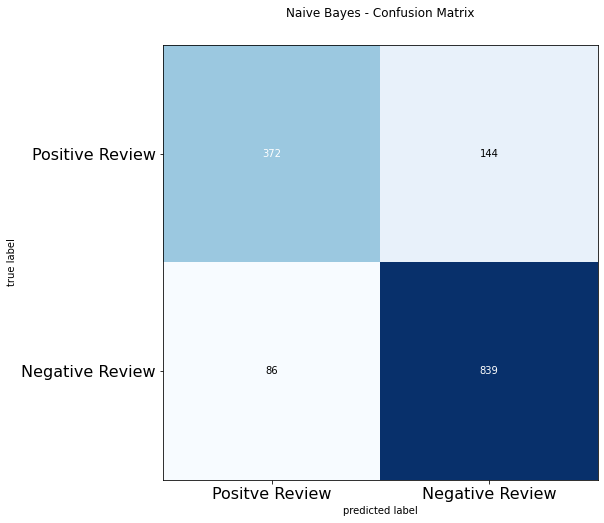

In [ ]:
cm = confusion_matrix(y_test, pred_2)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Naive Bayes - Confusion Matrix")
plt.xticks(range(2), ["Positve Review","Negative Review"], fontsize=16)
plt.yticks(range(2), ["Positive Review","Negative Review"], fontsize=16)
plt.show()

In [ ]:
# 3: Support Vector Machine (SVM)

In [ ]:
svm=SVC()
svm.fit(x_train,y_train)
pred_3=svm.predict(cv.transform(x_test))
score_3=accuracy_score(y_test,pred_3)

In [ ]:
# Accuracy 

In [ ]:
print(score_3*100)

82.78972935461485


In [ ]:
# prediction Score

In [ ]:
print(svm.predict(cv.transform(['Many unwanted ads'])))

[1]


In [ ]:
# Confusin Matrix:Support Vector Machine

<Figure size 432x288 with 0 Axes>

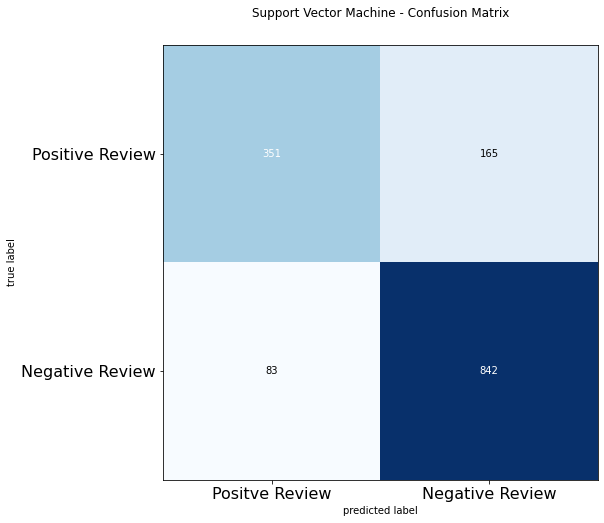

In [ ]:
cm = confusion_matrix(y_test, pred_3)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Support Vector Machine - Confusion Matrix")
plt.xticks(range(2), ["Positve Review","Negative Review"], fontsize=16)
plt.yticks(range(2), ["Positive Review","Negative Review"], fontsize=16)
plt.show()

In [ ]:
# Complete the prediction